<a href="https://colab.research.google.com/github/hedayet13/learning-opencv/blob/master/cifar10DatasetTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we learn how to train color image 



In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
# each shape
x_train[0].shape


(32, 32, 3)

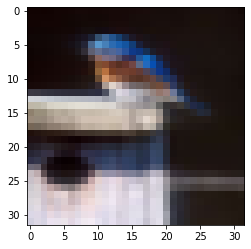

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[13])

In [9]:
x_train.max()

255

In [0]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from keras.utils import to_categorical

In [0]:
# check wikipedia CIFAR 10

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()
# 1
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 2
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# 128/256/512 ..... and so on
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer ='rmsprop',metrics = ['accuracy'] )

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [18]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)



Epoch 1/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5079 - accuracy: 0.4578
Epoch 2/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.1607 - accuracy: 0.5940
Epoch 3/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.0157 - accuracy: 0.6476
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.9128 - accuracy: 0.6846
Epoch 5/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.8259 - accuracy: 0.7180
Epoch 6/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7619 - accuracy: 0.7389
Epoch 7/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7013 - accuracy: 0.7601
Epoch 8/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.6521 - accuracy: 0.7788
Epoch 9/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.6057 - accuracy: 0.7937
Epoch 10/10
50000/50000 [==============================

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 292us/step


[1.1119402263641358, 0.661300003528595]

In [0]:
from sklearn.metrics import classification_report
prediction = model.predict_classes(x_test)

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1000
           1       0.80      0.80      0.80      1000
           2       0.46      0.64      0.53      1000
           3       0.50      0.46      0.48      1000
           4       0.62      0.56      0.59      1000
           5       0.79      0.36      0.50      1000
           6       0.67      0.81      0.73      1000
           7       0.79      0.69      0.74      1000
           8       0.68      0.83      0.75      1000
           9       0.76      0.75      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



In [0]:
model.save('cifar10_model.h5')